# Grocery Store Sales Lab

#### Review the first 10 rows of data.

In [2]:
import pandas as pd

In [3]:
stores_df = pd.read_csv('Stores.csv')

In [4]:
stores_df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


#### How many stores make more than 100,000$? What are their Ids?

In [5]:
stores_df[stores_df["Store_Sales"] > 100000]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
408,409,1303,1587,1310,102310
432,433,1365,1638,680,102920
557,558,1137,1374,700,101780
649,650,1989,2414,860,116320
758,759,1486,1758,820,101820
866,867,1565,1854,900,100900
868,869,1775,2104,980,105150


#### Create a new feature column of ratio between the Sales and Area of a store

In [6]:
stores_df["Sales_Area"] = stores_df["Store_Sales"] / stores_df["Store_Area"]

In [7]:
stores_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Area
0,1,1659,1961,530,66490,40.078360
1,2,1461,1752,210,39820,27.255305
2,3,1340,1609,720,54010,40.305970
3,4,1451,1748,620,53730,37.029635
4,5,1770,2111,450,46620,26.338983


#### Visual Report of Sales using a Histogram

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

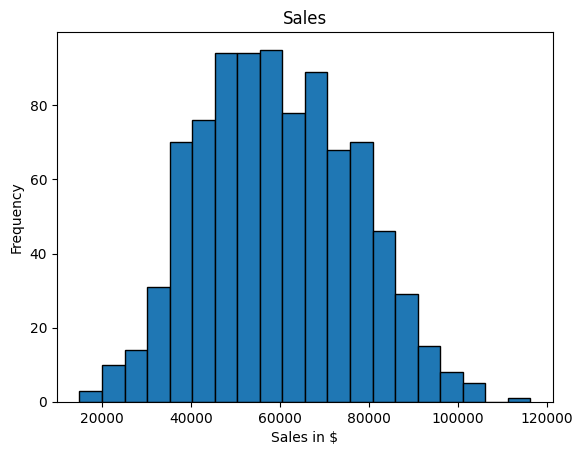

In [10]:
plt.figure()
plt.hist(stores_df["Store_Sales"], bins=20, edgecolor="black")
plt.title("Sales")
plt.xlabel("Sales in $")
plt.ylabel("Frequency")

#### Visual Report of Feature Correlation using a Heatmap

In [11]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

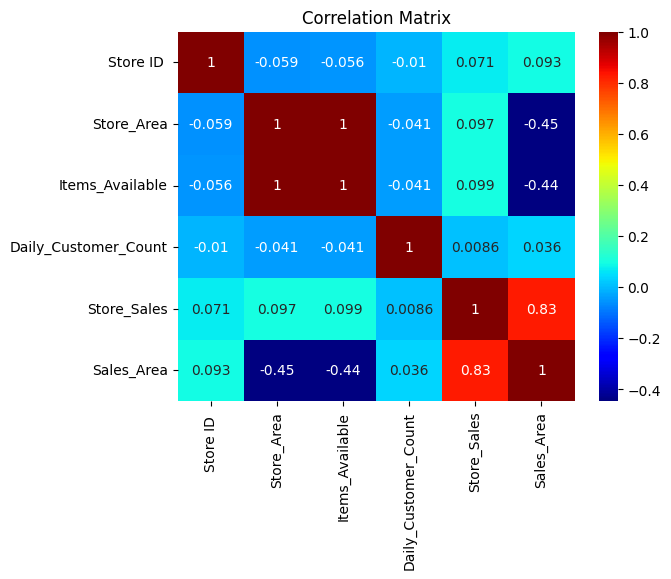

In [12]:
plt.figure()
sns.heatmap(stores_df.corr(), annot=True, cmap="jet")
plt.title("Correlation Matrix")

#### Split Data into a Training Set and a Test Set

In [13]:
from sklearn.model_selection import train_test_split

data, labels = stores_df.drop(["Store ID ","Store_Sales"], axis=1), stores_df["Store_Sales"]
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, random_state = 42)

#### Create a Linear Regression Model to Forecast Sales Column

In [16]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

#### Evaluate Forecast Results using Regression Metrics

In [17]:
from sklearn.metrics import mean_squared_error
preds = linear_regression.predict(X_test)
mean_squared_error(preds, y_test)**0.5 

3294.484197549969